<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Decision_Tree_Cross_Valid_Claude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

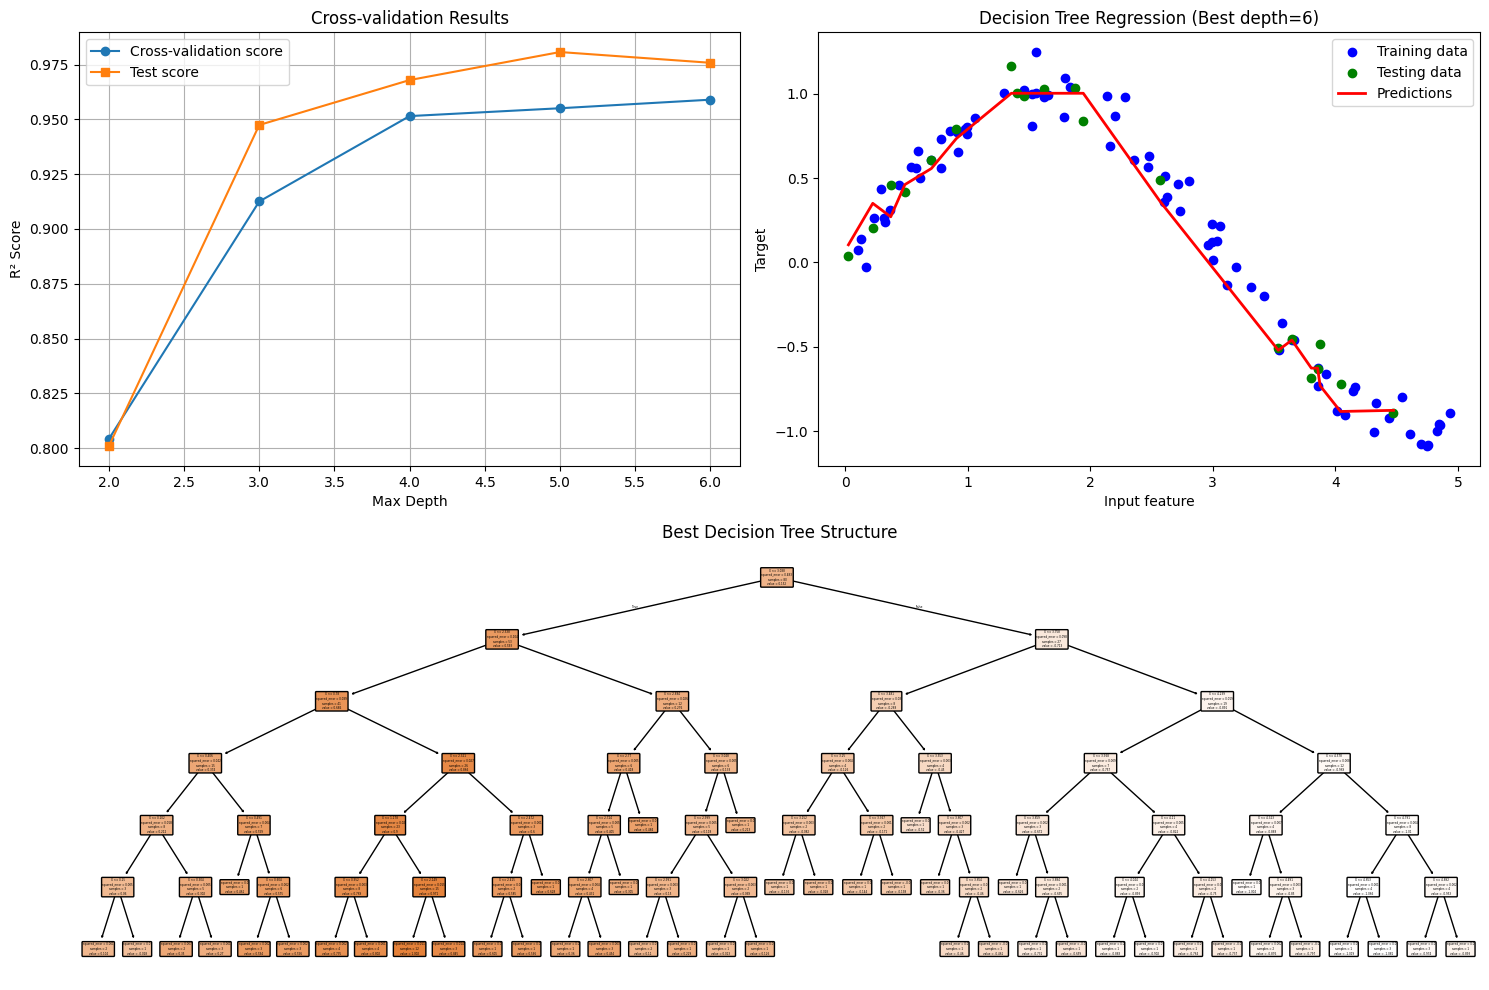


Cross-validation results:
Max depth 2:
  CV R² score: 0.8042
  Test R² score: 0.8009
Max depth 3:
  CV R² score: 0.9125
  Test R² score: 0.9474
Max depth 4:
  CV R² score: 0.9515
  Test R² score: 0.9679
Max depth 5:
  CV R² score: 0.9550
  Test R² score: 0.9807
Max depth 6:
  CV R² score: 0.9590
  Test R² score: 0.9758

Best max_depth: 6
Final model test R² score: 0.9758


In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform k-fold cross-validation with different max_depths
max_depths = [2, 3, 4, 5, 6]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
test_scores = []

for depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Get cross-validation scores
    scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='r2')
    cv_scores.append(scores.mean())

    # Fit model and get test score
    regressor.fit(X_train, y_train)
    test_scores.append(r2_score(y_test, regressor.predict(X_test)))

# Train final model with best max_depth
best_depth = max_depths[np.argmax(cv_scores)]
best_regressor = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_regressor.fit(X_train, y_train)

# Make predictions
X_test_sorted = np.sort(X_test, axis=0)
y_pred = best_regressor.predict(X_test_sorted)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Cross-validation results
plt.subplot(2, 2, 1)
plt.plot(max_depths, cv_scores, marker='o', label='Cross-validation score')
plt.plot(max_depths, test_scores, marker='s', label='Test score')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.title('Cross-validation Results')
plt.legend()
plt.grid(True)

# Plot 2: Data and predictions
plt.subplot(2, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test_sorted, y_pred, color='red', label='Predictions', linewidth=2)
plt.xlabel('Input feature')
plt.ylabel('Target')
plt.title(f'Decision Tree Regression (Best depth={best_depth})')
plt.legend()

# Plot 3: Tree visualization
plt.subplot(2, 2, (3, 4))
plot_tree(best_regressor, filled=True, feature_names=['X'], rounded=True)
plt.title('Best Decision Tree Structure')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nCross-validation results:")
for depth, cv_score, test_score in zip(max_depths, cv_scores, test_scores):
    print(f"Max depth {depth}:")
    print(f"  CV R² score: {cv_score:.4f}")
    print(f"  Test R² score: {test_score:.4f}")

print(f"\nBest max_depth: {best_depth}")
print(f"Final model test R² score: {r2_score(y_test, best_regressor.predict(X_test)):.4f}")